# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Read the Dataset file 

In [3]:
df = pd.read_csv('Madrid_cleaned_data.csv')

In [4]:
df.head()

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
0,21742,San Cristóbal,64.0,2,1,85000,1328
1,21741,Los Ángeles,70.0,3,1,129900,1856
2,21740,San Andrés,94.0,2,2,144247,1535
3,21739,San Andrés,64.0,2,1,109900,1717
4,21738,Los Rosales,108.0,2,2,260000,2407


In [5]:
df.sample(5)

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
12824,8536,Concepción,134.0,4,2,480000,3582
19482,1725,Barrio de Salamanca,150.0,4,2,800000,5333
1608,20119,Ensanche de Vallecas - La Gavia,80.0,2,2,273000,3412
12766,8594,Colina,323.0,4,3,815000,2523
1515,20212,Ensanche de Vallecas - La Gavia,52.0,1,1,230000,4423


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21177 entries, 0 to 21176
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   district           21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21177 non-null  int64  
 5   buy_price          21177 non-null  int64  
 6   buy_price_by_area  21177 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.1+ MB


c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

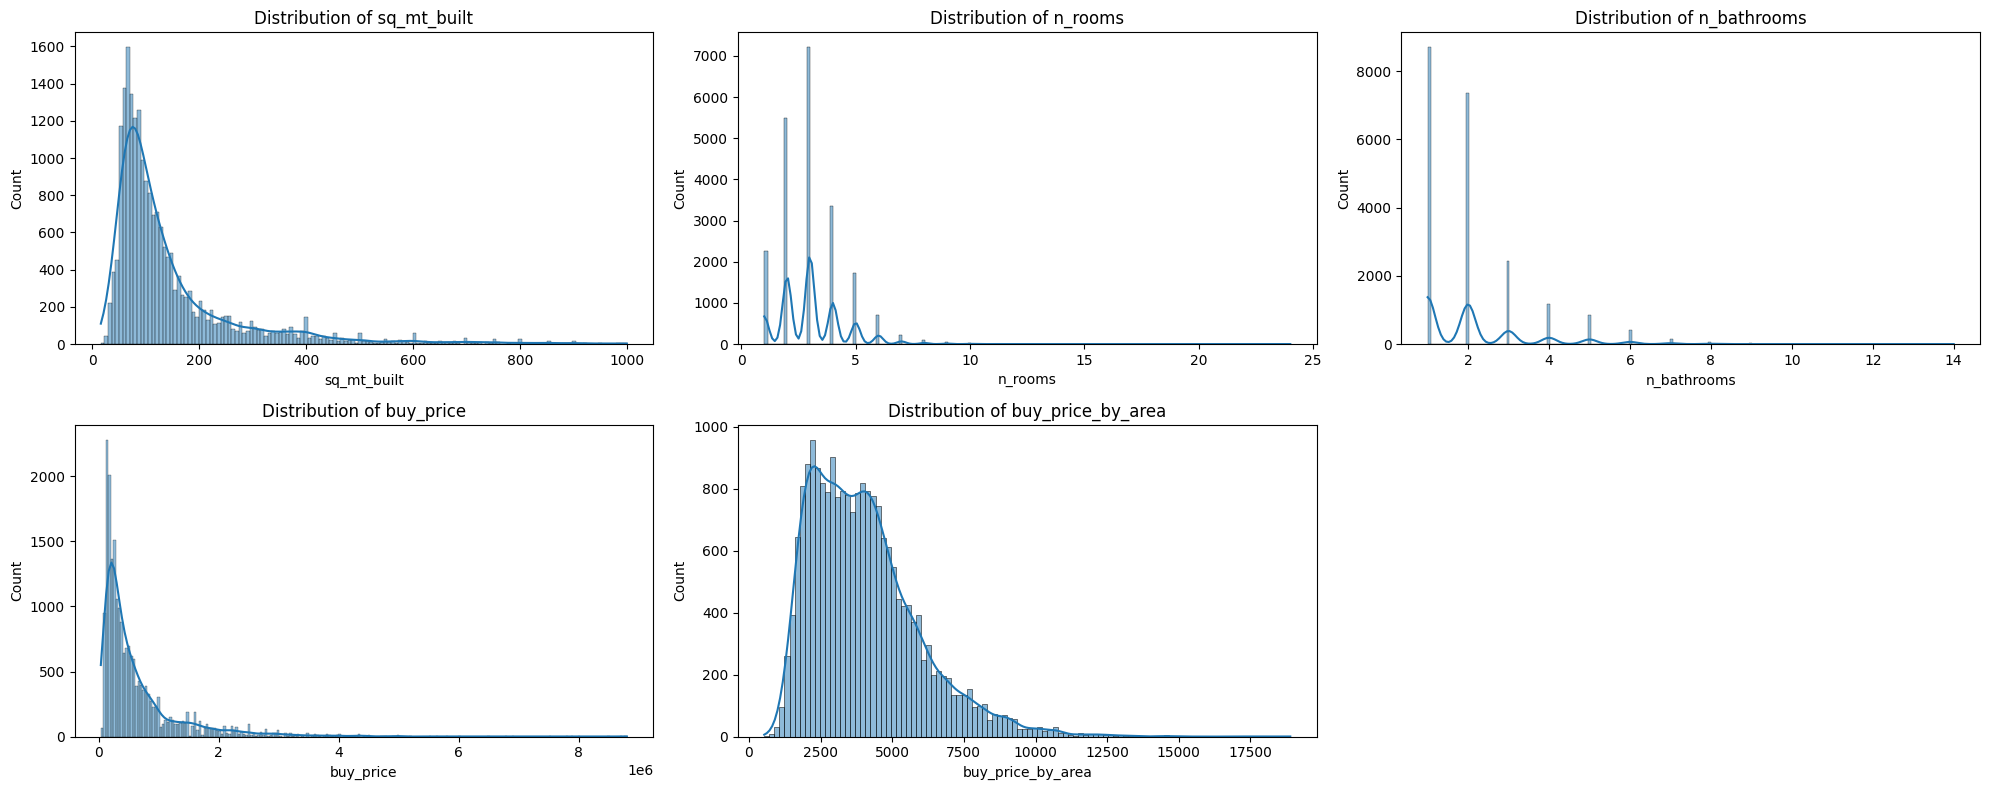

In [7]:
plt.figure(figsize=(20,8))
for e , i in enumerate(df.columns[2:]):
    plt.subplot(2,3,e+1)
    sns.histplot(df[i] , kde=True)
    plt.title('Distribution of ' + i)
    plt.tight_layout()

# Detecting if there Outliers using BoxPlot

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is 

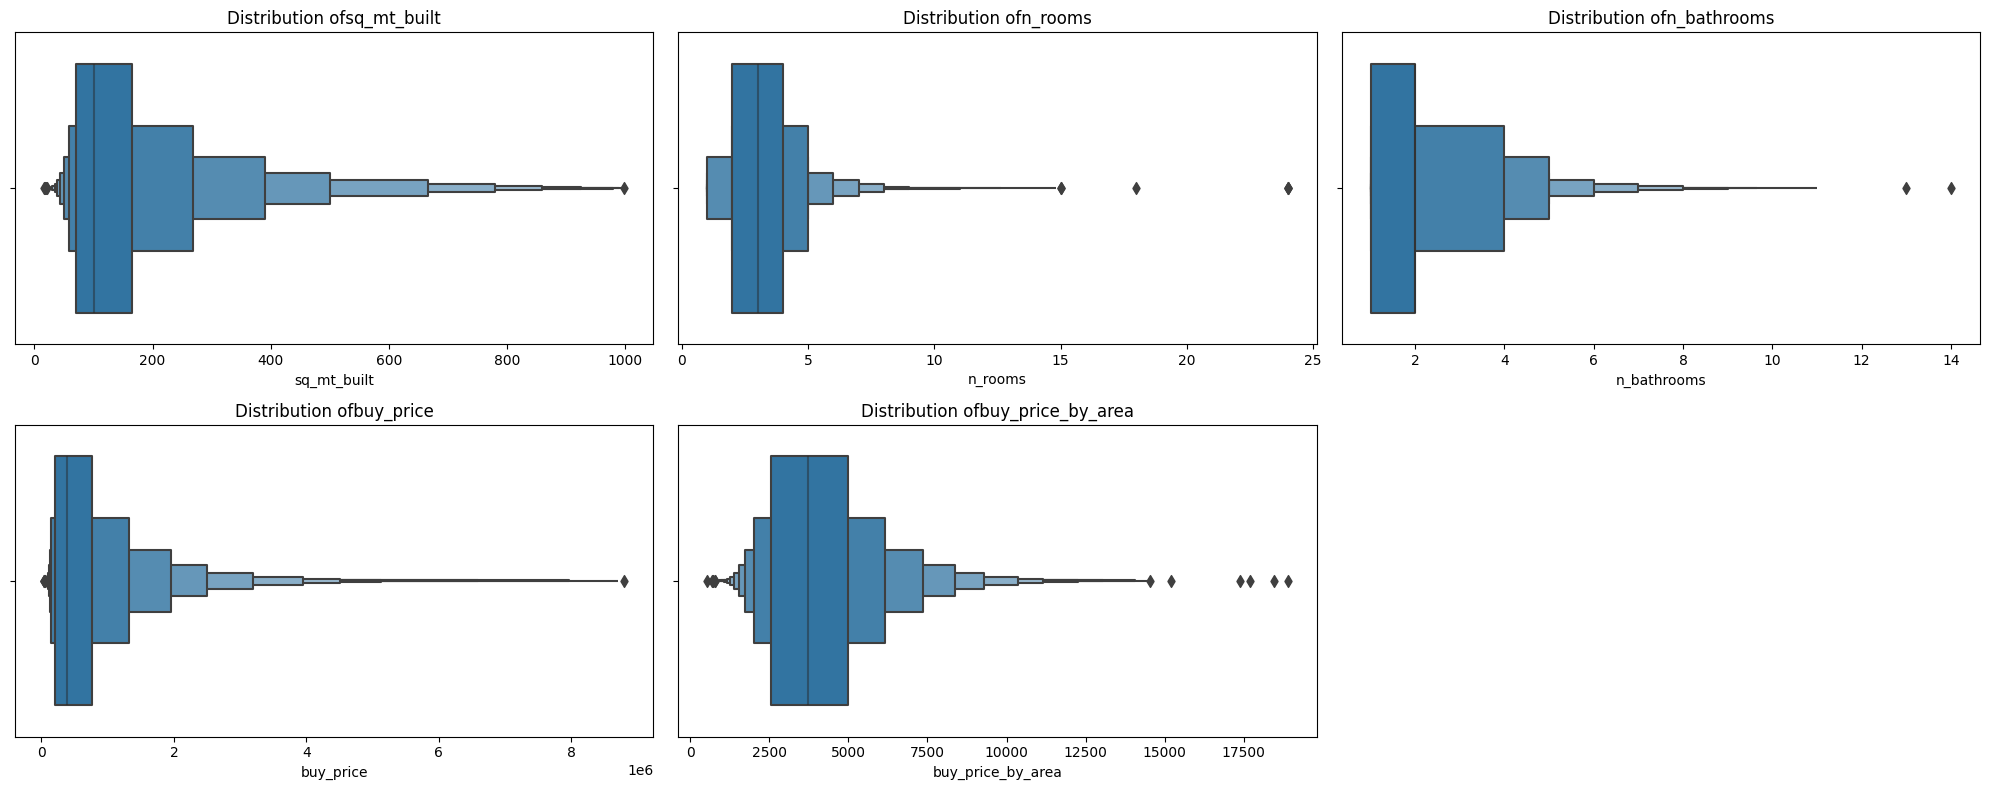

In [8]:
plt.figure(figsize=(20,8))
for e , i in enumerate(df.columns[2:]):
        plt.subplot(2,3,e+1)
        sns.boxenplot(x=df[i])
        plt.title('Distribution of' + i)
        plt.tight_layout()



In [9]:
x=df.iloc[:, 2:5].values
y=df.iloc[:, 2:5].values

print(x.shape)
print(y.shape)

(21177, 3)
(21177, 3)


In [10]:
from sklearn.feature_selection import SelectFromModel

df = pd.read_csv('Madrid_cleaned_data.csv')

sel = SelectFromModel(LinearRegression())

# Splitting the Data into Train and Test

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2 , random_state=0) 

# Trainnig the Model on the Trainning Set

In [12]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

# Predicting the test set results

In [13]:
y_pred = reg.predict(X_test)
print(y_pred)

[[ 69.   3.   2.]
 [131.   3.   2.]
 [ 55.   1.   1.]
 ...
 [ 74.   2.   2.]
 [241.   5.   5.]
 [218.   3.   2.]]


In [14]:
#reg.score(X_test , y_test)

In [15]:
#plt.scatter(X_train , y_train , color='red') 
#plt.plot(X_train, reg.predict(X_train), color = 'blue')
#plt.tight_layout()
#plt.show()

In [16]:
#from sklearn.metrics import mean_absolute_error

#MAE = mean_absolute_error(y_pred , y_test)
#print(MAE)